In [1]:
# Scientific libraries
import numpy_html
import numpy as np
import scipy.stats as stats
import scipy.special as sf
import scipy.integrate as integrate
import scipy.interpolate as interpolate

# import Pandas

import pandas as pd
import astropy.io.fits as fits
import astropy.units as u
import astropy.constants as const

# Graphic libraries

import matplotlib.pyplot as plt
%matplotlib notebook
from jupyterthemes import jtplot
plt.style.use('mike') 
jtplot.style(context='notebook', fscale=1, grid=False)
#import seaborn as sns

#optional 3ML imports

#from threeML import *
#from astromodels.xspec.xspec_settings import *
#from astromodels.xspec.factory import *

#useful libraries

from glob import glob
import copy
import collections
#import warnings
#warnings.simplefilter('ignore')


import stan_utility

In [2]:
fit = stan_utility.StanSavedFit('sncosmo_fit.h5')

/Users/jburgess/.environs/stan/lib/python3.7/site-packages/h5py-2.9.0-py3.7-macosx-10.14-x86_64.egg/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


<IPython.core.display.Javascript object>


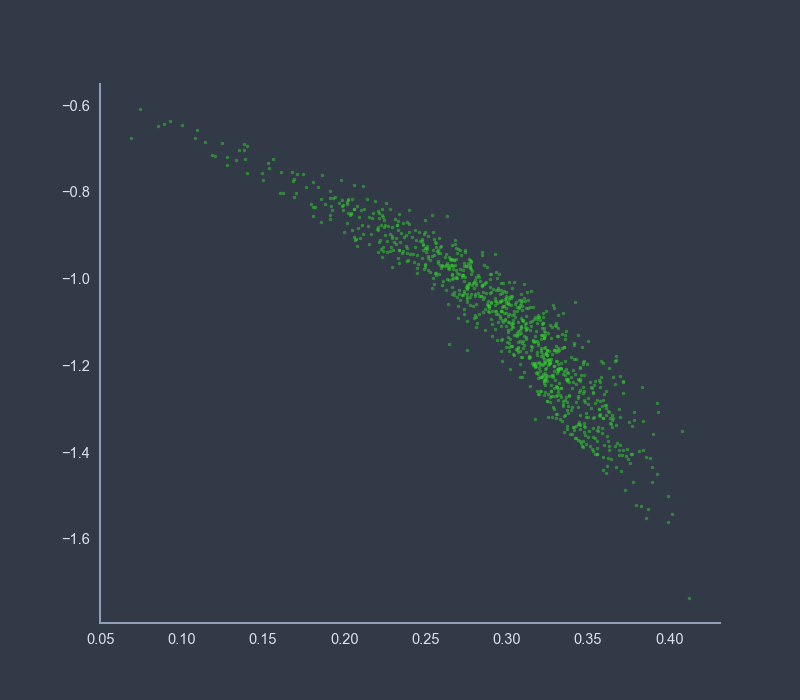

In [6]:
fig, ax = plt.subplots()


ax.scatter(fit.Om,fit.w,s=5, c='limegreen', alpha=.5)
